<a href="https://colab.research.google.com/github/hcoh99/AI_study/blob/main/%08CNN_CSE_CIC_IDS2018ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd
df = pd.read_csv('/content/02-14-2018.csv')
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0,0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0,0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0,0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0,0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0,0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85475,21,6,14/02/2018 11:16:18,1,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
85476,21,6,14/02/2018 11:16:18,1,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
85477,21,6,14/02/2018 11:16:18,2,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
85478,21,6,14/02/2018 11:16:18,13,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce


In [ ]:

# 결측치 확인
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            1
Length: 80, dtype: int64

In [ ]:

# 결측치 제거
df = df.dropna()
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [ ]:
label_encode = LabelEncoder()
df['Timestamp'] = label_encode.fit_transform(df['Timestamp'].values.ravel())
df

<ipython-input-31-01a3a3584147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = label_encode.fit_transform(df['Timestamp'].values.ravel())


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,1,112641719,3,0,0,0,0,0,...,0,0,0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,2,112641466,3,0,0,0,0,0,...,0,0,0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,3,112638623,3,0,0,0,0,0,...,0,0,0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,5,6453966,15,10,1239,2273,744,0,...,32,0,0,0,0,0.0,0.000000,0,0,Benign
4,22,6,6,8804066,14,11,1143,2209,744,0,...,32,0,0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85474,21,6,2651,2,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
85475,21,6,2651,1,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
85476,21,6,2651,1,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce
85477,21,6,2651,2,1,1,0,0,0,0,...,40,0,0,0,0,0.0,0.000000,0,0,FTP-BruteForce


In [ ]:
X=df.drop('Label',axis=1)
X.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,1,112641719,3,0,0,0,0,0,...,0,0,0,0,0,0,56320859.5,139.300036,56320958,56320761
1,0,0,2,112641466,3,0,0,0,0,0,...,0,0,0,0,0,0,56320733.0,114.551299,56320814,56320652
2,0,0,3,112638623,3,0,0,0,0,0,...,0,0,0,0,0,0,56319311.5,301.934596,56319525,56319098
3,22,6,5,6453966,15,10,1239,2273,744,0,...,6,32,0,0,0,0,0.0,0.000000,0,0
4,22,6,6,8804066,14,11,1143,2209,744,0,...,6,32,0,0,0,0,0.0,0.000000,0,0


In [ ]:
y=df['Label']
y.value_counts()

FTP-BruteForce    85364
Benign              112
Name: Label, dtype: int64

In [ ]:

y.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [ ]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 100)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 100)
print(X_test.shape, y_test.shape)

(76829, 100, 79) (76829,)
(8449, 100, 79) (8449,)


In [ ]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [ ]:
X_train = X_train.astype('float32')
y_train_onehot = y_train_onehot.astype('float32')
X_test = X_test.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [ ]:
X.values

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.39300036e+02, 5.63209580e+07, 5.63207610e+07],
       [0.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        1.14551299e+02, 5.63208140e+07, 5.63206520e+07],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        3.01934596e+02, 5.63195250e+07, 5.63190980e+07],
       ...,
       [2.10000000e+01, 6.00000000e+00, 2.65100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+01, 6.00000000e+00, 2.65100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+01, 6.00000000e+00, 2.65100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [ ]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 79)]         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 64)            15232     
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 416,834
Trainable params: 416,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(type(y_train_onehot))

<class 'numpy.ndarray'>


In [ ]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
2161/2161 [==============================] - 42s 19ms/step - loss: 1007.2882 - accuracy: 0.9994 - val_loss: 0.7157 - val_accuracy: 0.9999
Epoch 2/30
2161/2161 [==============================] - 39s 18ms/step - loss: 315.8870 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
2161/2161 [==============================] - 39s 18ms/step - loss: 136.7697 - accuracy: 1.0000 - val_loss: 0.2737 - val_accuracy: 0.9999
Epoch 4/30
2161/2161 [==============================] - 41s 19ms/step - loss: 7.0922 - accuracy: 0.9998 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 5/30
2161/2161 [==============================] - 42s 19ms/step - loss: 3.3937e-04 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 6/30
2161/2161 [==============================] - 43s 20ms/step - loss: 2.8352e-04 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 7/30
2161/2161 [==============================] - 41s 19ms/step - loss: 2.3498e-04 - accuracy: 1.00

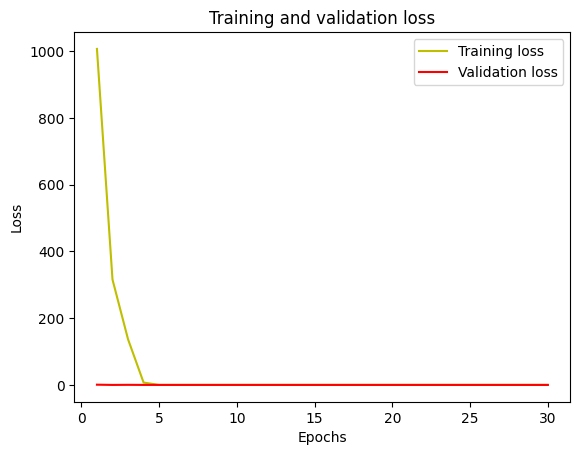

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

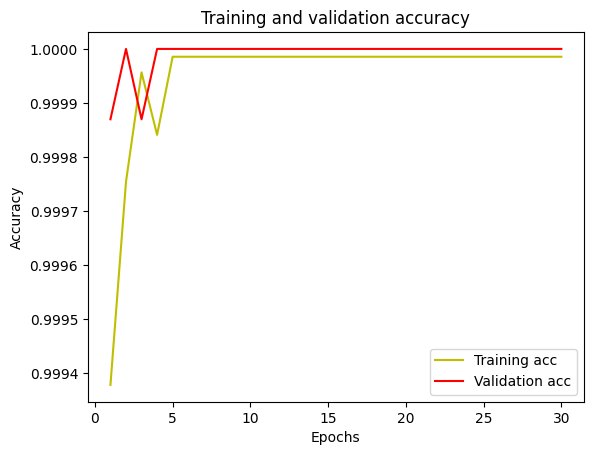

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

265/265 [==============================] - 2s 8ms/step


In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00      8432

    accuracy                           1.00      8449
   macro avg       0.97      1.00      0.99      8449
weighted avg       1.00      1.00      1.00      8449

[[  17    0]
 [   1 8431]]
